# Machine Learning Lab 3

## Loading the Iris Dataset


In [1]:
from scipy.io import arff
import pandas as pd

# load the iris.arff data set
data = arff.loadarff('data/iris.arff')
iris_df = pd.DataFrame(data[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8') # fixes byte strings, avoiding strings like b'Iris-versicolor'

# print the top of the file (just to check it's read and processed OK)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset information / basic stats

In [2]:
print("\nGeneral info\n")
print(iris_df.info())

print("\nStatistics (of numeric features)\n")
print(iris_df.describe())

print("\nInfo about the class\n")
print(iris_df['class'].describe(),"\n")
print(iris_df['class'].value_counts())


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistics (of numeric features)

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    

## Basic Plotting

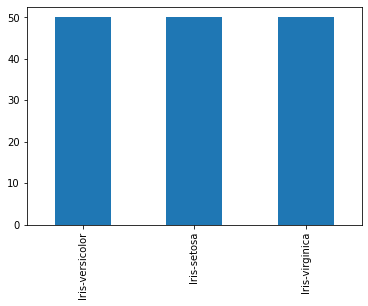

In [3]:
import matplotlib.pyplot as plt

# task 1.3.1
plt.figure();
iris_df['class'].value_counts().plot(kind="bar");

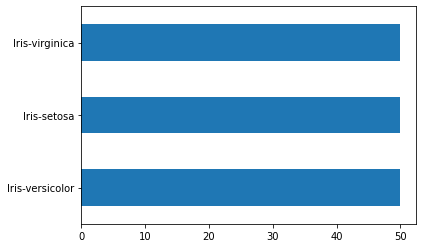

In [4]:
# task 1.3.2
plt.figure();
iris_df['class'].value_counts().plot(kind="barh");

<AxesSubplot:>

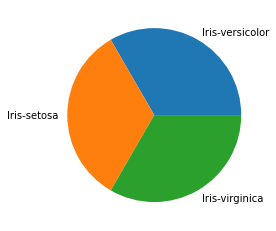

In [5]:
# Task 1.3.3
plt.figure()
iris_df['class'].value_counts().plot(kind="pie", ylabel="")

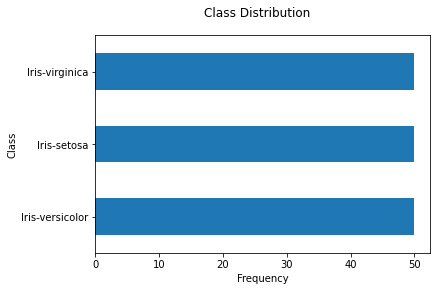

In [6]:
# Task 1.3.4 - the matplotlib way
plt.figure();
plt.suptitle('Class Distribution')
plt.xlabel('Frequency')
plt.ylabel('Class')
iris_df['class'].value_counts().plot(kind="barh");

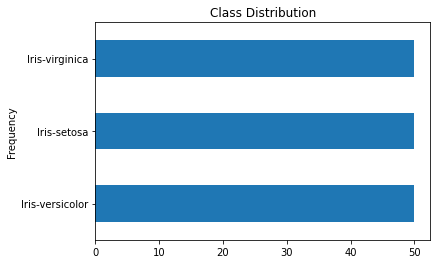

In [7]:
# Task 1.3.4
plt.figure();
iris_df['class'].value_counts().plot(kind="barh", title='Class Distribution', xlabel='Frequency');

## Visualising feature data

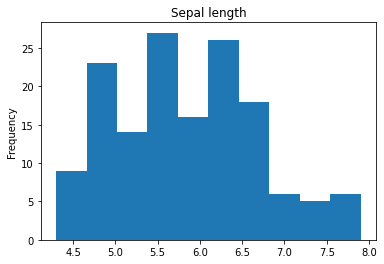

In [8]:
# Task 1.4.1
plt.figure();
iris_df['sepallength'].plot(kind='hist', title='Sepal length');

<Figure size 432x288 with 0 Axes>

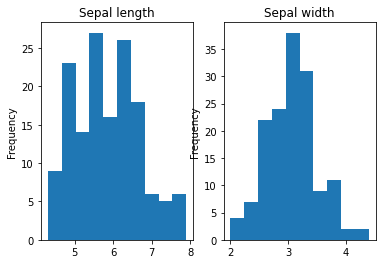

In [9]:
# Task 1.4.2
fig = plt.figure();

# Setting up figure with two sub-plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# Plotting to axes 0 and 1 (zero indexed, like a normal array)
iris_df['sepallength'].plot(ax=axs[0], kind='hist', title='Sepal length');
iris_df['sepalwidth'].plot(ax=axs[1], kind='hist', title='Sepal width');

<Figure size 432x288 with 0 Axes>

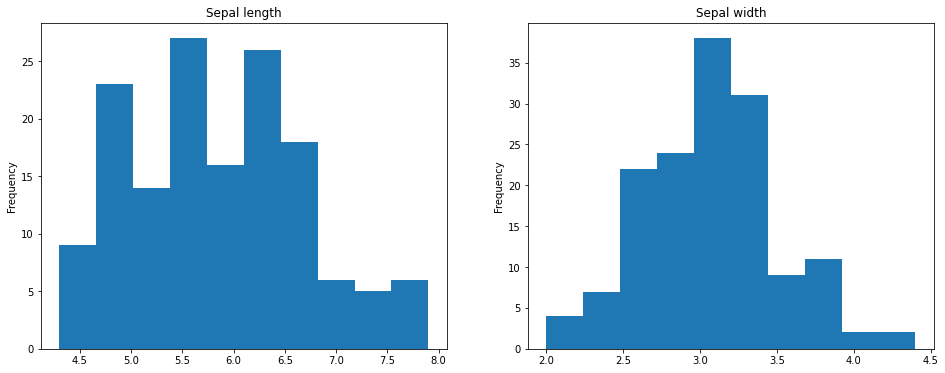

In [10]:
# Task 1.4.2
fig = plt.figure();

# Setting up figure with two sub-plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6)) # adds figure size

# Plotting to axes 0 and 1 (zero indexed, like a normal array)
iris_df['sepallength'].plot(ax=axs[0], kind='hist', title='Sepal length');
iris_df['sepalwidth'].plot(ax=axs[1], kind='hist', title='Sepal width');

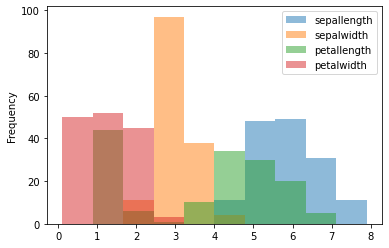

In [11]:
# Task 1.4.3 - a histogram for all features
iris_df.plot(kind='hist', alpha=0.5);

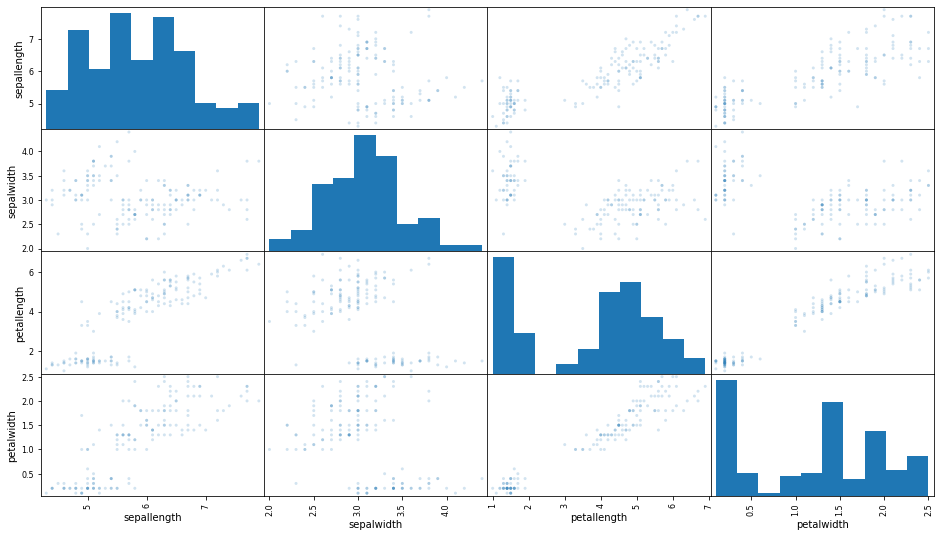

In [12]:
# Task 1.4.4

from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, alpha=0.2, figsize=(16, 9));

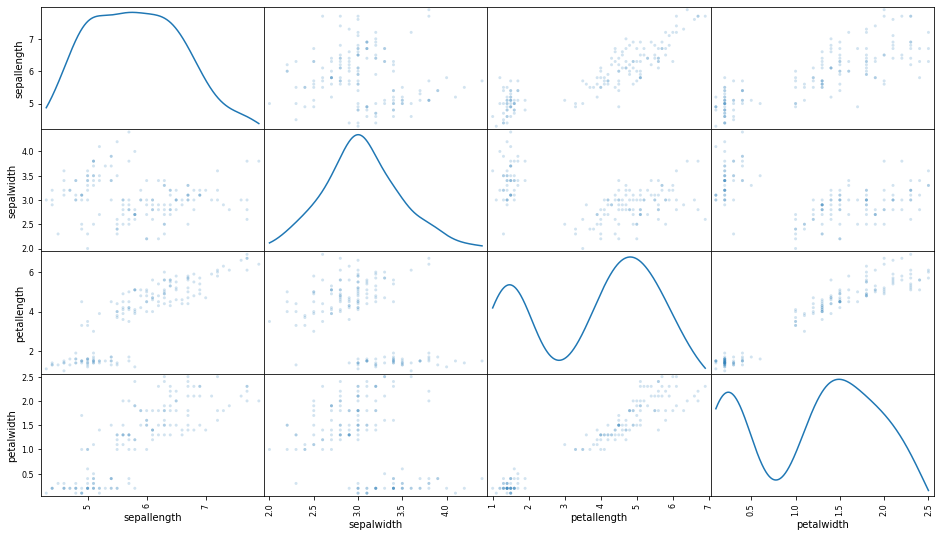

In [13]:
# Task 1.4.4 - with kernel density estimation; a taster on something to come ;)

from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, alpha=0.2, figsize=(16, 9), diagonal='kde');

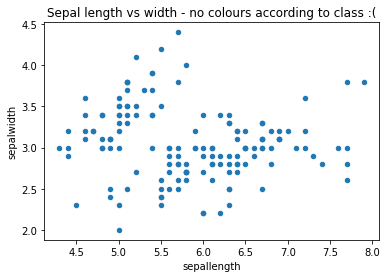

In [14]:
# Task 1.4.5 - a simple scatter plot for sepal length vs sepal width
iris_df.plot(kind='scatter', x='sepallength', y='sepalwidth', title='Sepal length vs width - no colours according to class :(');

<Figure size 432x288 with 0 Axes>

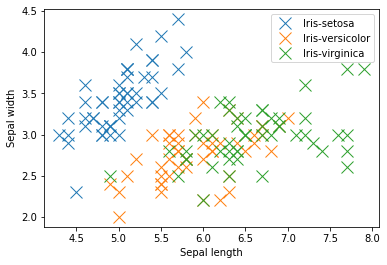

In [15]:
# Task 1.4.6 - a colour coded scatter plot according to class (also for for sepal length vs sepal width)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = iris_df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.sepallength, group.sepalwidth, marker='x', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

# add legend to the figure
ax.legend()

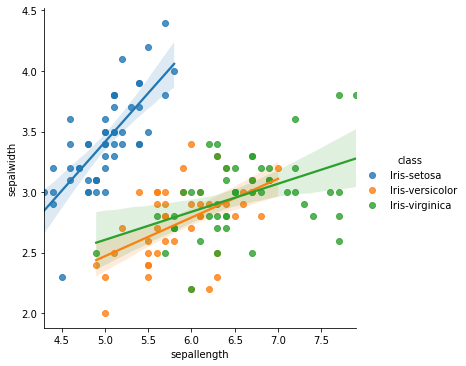

In [16]:
import seaborn as sns
sns.lmplot(data=iris_df, x="sepallength", y="sepalwidth", hue='class')

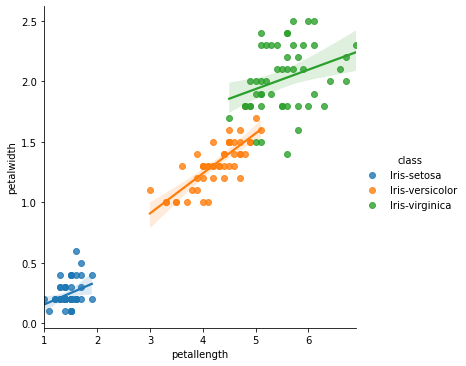

In [17]:
import seaborn as sns
sns.lmplot(data=iris_df, x="petallength", y="petalwidth", hue='class')

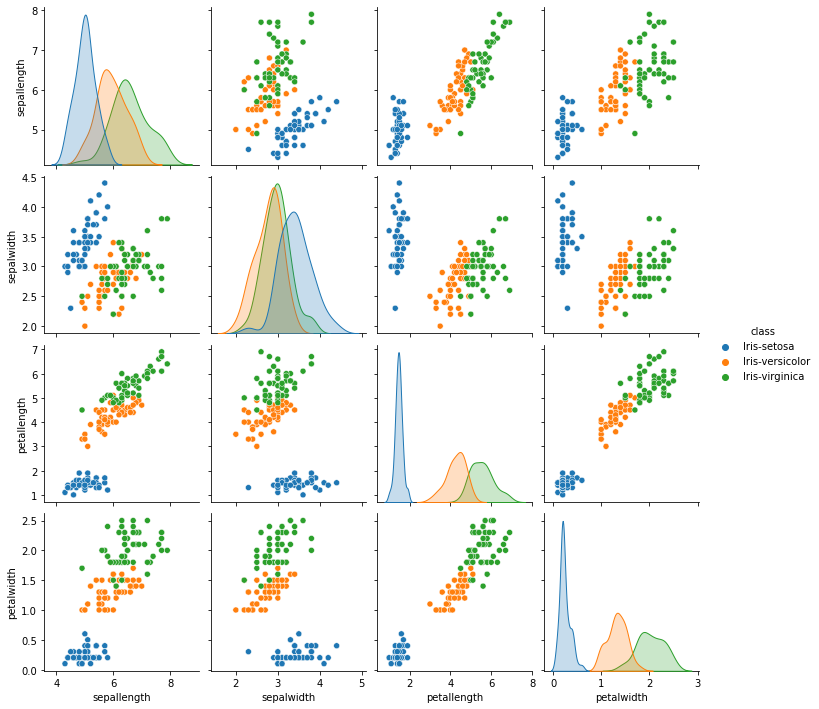

In [18]:
sns.pairplot(data=iris_df, hue="class")

## Noise

Text(0, 0.5, 'Cm')

<Figure size 432x288 with 0 Axes>

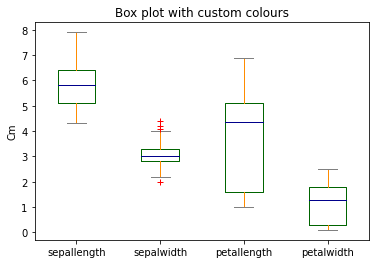

In [19]:
plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = iris_df.plot.box(color=color, sym='r+');
box_plot.set_title('Box plot with custom colours')
box_plot.set_ylabel('Cm')

<AxesSubplot:>

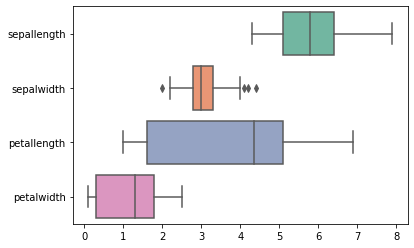

In [20]:
# and... using Seborn
sns.boxplot(data=iris_df, orient="h", palette="Set2")

## Correlation Analysis

In [21]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

corr, _ = pearsonr(iris_df['sepallength'], iris_df['sepalwidth'])
print('Sepal length & sepal width (Pearson):  %.3f' % corr)

corr, _ = spearmanr(iris_df['sepallength'], iris_df['sepalwidth'])
print('Sepal length & sepal width (Spearman): %.3f' % corr)

Sepal length & sepal width (Pearson):  -0.109
Sepal length & sepal width (Spearman): -0.159


In [22]:
# Compute pairwise correlation of all features

# Using Pearson's (linear relationship) - assumes normal distribution
corr = iris_df.corr(method='pearson')
print (corr)

# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = iris_df.corr(method='spearman')
print ("\n",corr)

             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000

              sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.159457     0.881386    0.834421
sepalwidth     -0.159457    1.000000    -0.303421   -0.277511
petallength     0.881386   -0.303421     1.000000    0.936003
petalwidth      0.834421   -0.277511     0.936003    1.000000


In [23]:
# Question 1.6.1 - petal length and petal width have the strongest correlation

<AxesSubplot:>

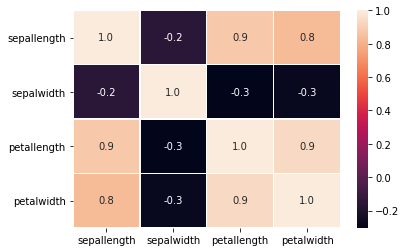

In [24]:
# Correlation matrix - Seaborn heatmap 
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')

<AxesSubplot:>

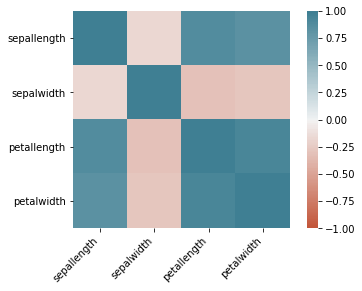

In [25]:
# Correlation matrix - customisations
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax

<class 'pandas.core.frame.DataFrame'>


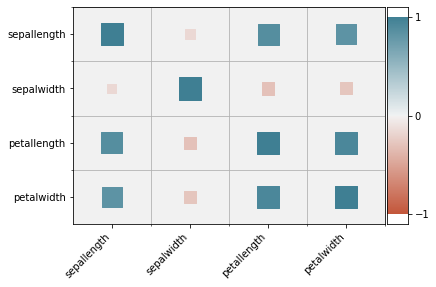

In [26]:
# Correlation matrix - https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
import heatmap

print(type(corr))

heatmap.corrplot(corr)

## Loading the IMDB Movies Dataset

In [27]:
imdb_df = pd.read_csv("data/imdb.csv")
imdb_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [28]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1003 non-null   int64  
 1   Title               1003 non-null   object 
 2   Genre               1003 non-null   object 
 3   Description         1003 non-null   object 
 4   Director            1003 non-null   object 
 5   Actors              1003 non-null   object 
 6   Year                1003 non-null   int64  
 7   Runtime (Minutes)   1003 non-null   int64  
 8   Rating              1003 non-null   float64
 9   Votes               1003 non-null   int64  
 10  Revenue (Millions)  875 non-null    float64
 11  Metascore           939 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 94.2+ KB


In [29]:
imdb_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1003.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,875.000000,939.000000
mean,500.027916,2012.792622,113.133599,6.723729,1.695483e+05,83.262971,58.980831
std,289.634451,3.205980,18.802899,0.946089,1.885594e+05,103.402573,17.268532
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,249.500000,2010.000000,100.000000,6.200000,3.630600e+04,13.350000,47.000000
50%,500.000000,2014.000000,110.000000,6.800000,1.108250e+05,48.020000,60.000000
75%,750.500000,2016.000000,123.000000,7.400000,2.392805e+05,114.665000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Duplicates

In [30]:
# Get a Pandas Series (vector) indicating TRUE for rows that are a duplicate
imdb_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000    False
1001    False
1002     True
Length: 1003, dtype: bool

In [31]:
# Counting the True/False entries - should show 3 duplicates (True)
imdb_df.duplicated().value_counts()

False    1000
True        3
dtype: int64

In [32]:
# Get the actual rows that are duplicates
duplicate_rows = imdb_df[imdb_df.duplicated()]
duplicate_rows

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
14,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
15,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
1002,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [33]:
# Removing the duplicate rows
imdb_df = imdb_df.drop_duplicates()

imdb_df.shape # should now show 1000 instances

(1000, 12)

## Missing Values

In [34]:
# Get DataFrame indicating True/False for whether values are missing or not
# True = value is missing
imdb_df.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
997,False,False,False,False,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,True,False


In [35]:
# Get the number of missing entries per feature (column)
# PS: imdb_df.info() actually gives us information about this too
imdb_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [36]:
# Dropping all rows with missing values
imdb_df_dropna = imdb_df.dropna()
imdb_df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [37]:
# Imputing missing values, using the mean
imdb_df_mean = imdb_df.fillna(imdb_df.median())
imdb_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1001
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 101.6+ KB


## ML Assessment Analysis

In [38]:
dataset = pd.read_csv('data/ml-assessment-dataset.csv')
dataset.head()

,L4 mean mark,Did formative assessment,Submitted,Plagiarism,VLE content visited,Lecture engagement,Lab engagement,Classifier impl,Code mark,Report mark,Total mark,Class
0,87,0,1,0,0.15,0.30,0.20,Ensemble,10,35,45,1
1,83,1,1,0,0.42,0.75,0.50,K-NN,28,68,96,1
2,75,0,1,0,0.38,1.00,0.80,Ensemble,28,55,83,1
3,77,1,1,0,0.80,1.00,0.90,Ensemble,30,62,92,1
4,65,0,1,1,0.34,0.50,0.15,K-NN,0,35,35,0


In [39]:
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = dataset.corr(method='spearman')
print (corr)

                          L4 mean mark  Did formative assessment  Submitted  \
L4 mean mark                  1.000000                  0.453036   0.531852   
Did formative assessment      0.453036                  1.000000   0.275168   
Submitted                     0.531852                  0.275168   1.000000   
Plagiarism                   -0.242449                 -0.218218  -0.078811   
VLE content visited           0.435345                  0.499265   0.345063   
Lecture engagement            0.453697                  0.490768   0.441006   
Lab engagement                0.573882                  0.482344   0.351073   
Code mark                     0.652631                  0.429723   0.650205   
Report mark                   0.766479                  0.575122   0.737675   
Total mark                    0.751667                  0.538021   0.737540   
Class                         0.731202                  0.509175   0.551677   

                          Plagiarism  VLE content v

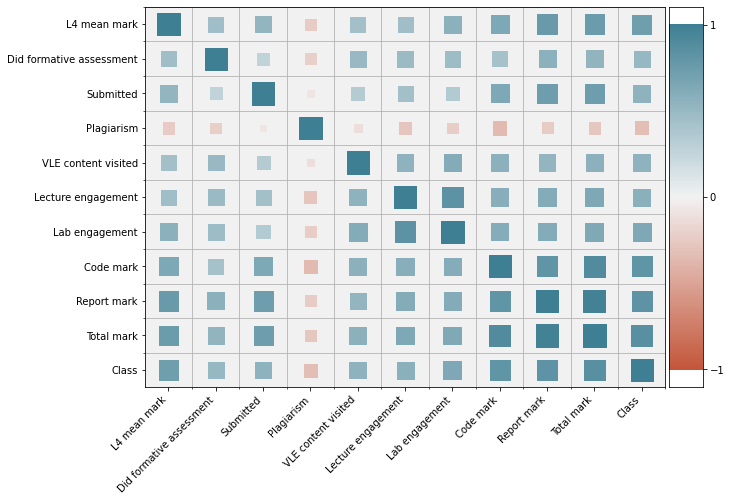

In [40]:
plt.figure(figsize=(10, 7));
heatmap.corrplot(corr)